# Decision Trees

## Classification Trees

<img src="http://houseofbots.com/images/news/3292/cover.png" heigh="600" width="700"></img>


Decision trees are a group of alfgorithms wich try to find optimal rules that may partition the data in homogeneous group that show the same outcome.

<img src="https://d35fo82fjcw0y8.cloudfront.net/2016/03/03210615/decision-tree1.png"  heigh="600" width="700"> </img>

## CART

One of the most commonly used decision trees is <b>CART</b>, which means Classification And Regression Trees.
 
Cart is found in the R package <i> tree </i>. We can run it as follows:

In [1]:
library(tree)

iris.cart <- tree(Species ~., iris)

In [3]:
iris.cart

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 150 329.600 setosa ( 0.33333 0.33333 0.33333 )  
   2) Petal.Length < 2.45 50   0.000 setosa ( 1.00000 0.00000 0.00000 ) *
   3) Petal.Length > 2.45 100 138.600 versicolor ( 0.00000 0.50000 0.50000 )  
     6) Petal.Width < 1.75 54  33.320 versicolor ( 0.00000 0.90741 0.09259 )  
      12) Petal.Length < 4.95 48   9.721 versicolor ( 0.00000 0.97917 0.02083 )  
        24) Sepal.Length < 5.15 5   5.004 versicolor ( 0.00000 0.80000 0.20000 ) *
        25) Sepal.Length > 5.15 43   0.000 versicolor ( 0.00000 1.00000 0.00000 ) *
      13) Petal.Length > 4.95 6   7.638 virginica ( 0.00000 0.33333 0.66667 ) *
     7) Petal.Width > 1.75 46   9.635 virginica ( 0.00000 0.02174 0.97826 )  
      14) Petal.Length < 4.95 6   5.407 virginica ( 0.00000 0.16667 0.83333 ) *
      15) Petal.Length > 4.95 40   0.000 virginica ( 0.00000 0.00000 1.00000 ) *

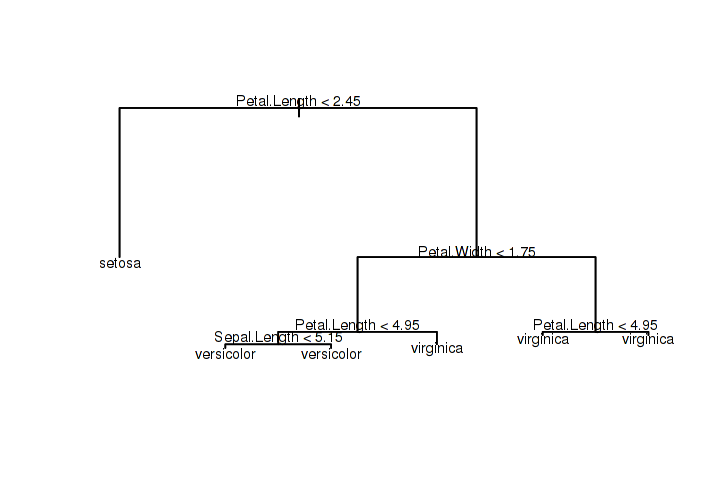

In [6]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(iris.cart)
text(iris.cart, cex=0.7)

We will make the prediction of the dataset and compare the resulting prediction to the original labels using a contingency table

In [9]:
cart.pred <- predict(iris.cart, newdata=iris, type="class")
table(pred=cart.pred, observ=iris$Species)

            observ
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         1
  virginica       0          3        49

Another package that implements the CART algorithm is <b> RPART </b> (Recursive Partitioning And Regression Trees):

In [10]:
library(rpart)

iris.rpart <- rpart(Species ~., iris)
iris.rpart

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

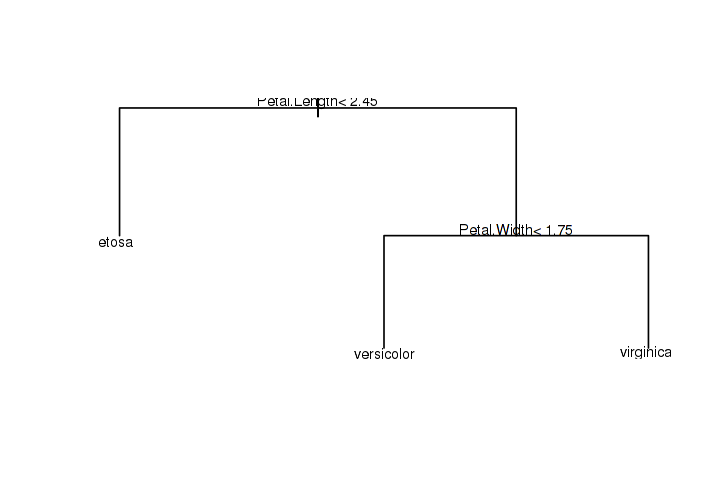

In [12]:
plot(iris.rpart)
text(iris.rpart, cex=0.7)

In [13]:
cart.pred <- predict(iris.cart, newdata=iris, type="class")
table(pred=cart.pred, observ=iris$Species)

            observ
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         47         1
  virginica       0          3        49

As we can see, both give the same results. In the first algorithm there were 15 rules, while in the second there were only 7 rules

The RPART algorithm executes automatically an analysis that is called <b><i>pruning</i></b>. This algorithm eliminates the branches and leafs that do not add additional information gain. Thus, the result is the same and the tree is simplier.

## C4.5 tree

The C4.5 algoritm is not directly implemented in R. However, to use it in R we can call a package called RWeka, that is an interface to the <a href="https://www.cs.waikato.ac.nz/ml/weka/"> WEKA java library for data mining </a>. This library has lots of algorithms that are avalaible to R by using the RWeka library. The C4.5 algorithm is called in WEKA J48.

In [16]:
library(RWeka)
iris.C45 <- J48(Species~., data=iris)
# summarize the fit
summary(iris.C45)



=== Summary ===

Correctly Classified Instances         147               98      %
Incorrectly Classified Instances         3                2      %
Kappa statistic                          0.97  
Mean absolute error                      0.0233
Root mean squared error                  0.108 
Relative absolute error                  5.2482 %
Root relative squared error             22.9089 %
Total Number of Instances              150     

=== Confusion Matrix ===

  a  b  c   <-- classified as
 50  0  0 |  a = setosa
  0 49  1 |  b = versicolor
  0  2 48 |  c = virginica

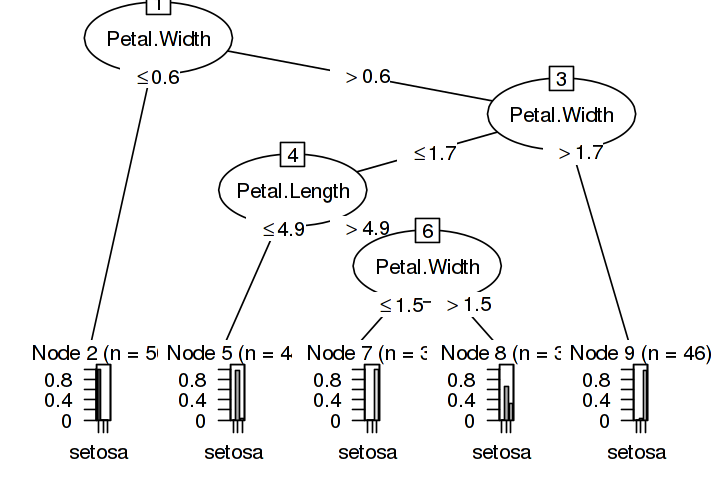

In [19]:
plot(iris.C45)

## C5.0 algoritm

This algorithm, was closed source until recently that the code was released and brought to R on the <b>C50</b> package. It uses the Quinlan's C5.0 algorithm, which is a newer version of the C4.5 version of the same author.


In [26]:
library(C50)

iris.C50 <- C5.0(Species ~ ., data = iris)
iris.C50


Call:
C5.0.formula(formula = Species ~ ., data = iris)

Classification Tree
Number of samples: 150 
Number of predictors: 4 

Tree size: 4 

Non-standard options: attempt to group attributes


In [27]:
summary(iris.C50)


Call:
C5.0.formula(formula = Species ~ ., data = iris)


C5.0 [Release 2.07 GPL Edition]  	Wed Nov 14 11:43:19 2018
-------------------------------

Class specified by attribute `outcome'

Read 150 cases (5 attributes) from undefined.data

Decision tree:

Petal.Length <= 1.9: setosa (50)
Petal.Length > 1.9:
:...Petal.Width > 1.7: virginica (46/1)
    Petal.Width <= 1.7:
    :...Petal.Length <= 4.9: versicolor (48/1)
        Petal.Length > 4.9: virginica (6/2)


Evaluation on training data (150 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     4    4( 2.7%)   <<


	   (a)   (b)   (c)    <-classified as
	  ----  ----  ----
	    50                (a): class setosa
	          47     3    (b): class versicolor
	           1    49    (c): class virginica


	Attribute usage:

	100.00%	Petal.Length
	 66.67%	Petal.Width


Time: 0.0 secs


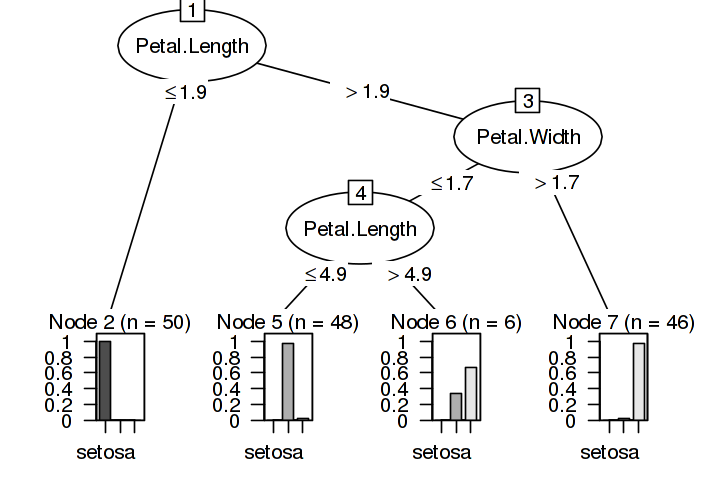

In [28]:
plot(iris.C50)

## Conditional trees
 
Conditional trees are the bayesian way of generating decision trees. There are two packages <b>party</b> and <b>partykit</b> brings this type of algorithm to R. As the package states it can make: "recursive partitioning for continuous, censored, ordered, nominal and multivariate response variables in a conditional inference framework". 
 
This tree algorithm could be used for classification (binary, multiclass and multilabel) and regression (linear, ordinal).


In [31]:
library(partykit)

iris.ctree <- ctree(Species ~., data=iris)
iris.ctree

Loading required package: grid



Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

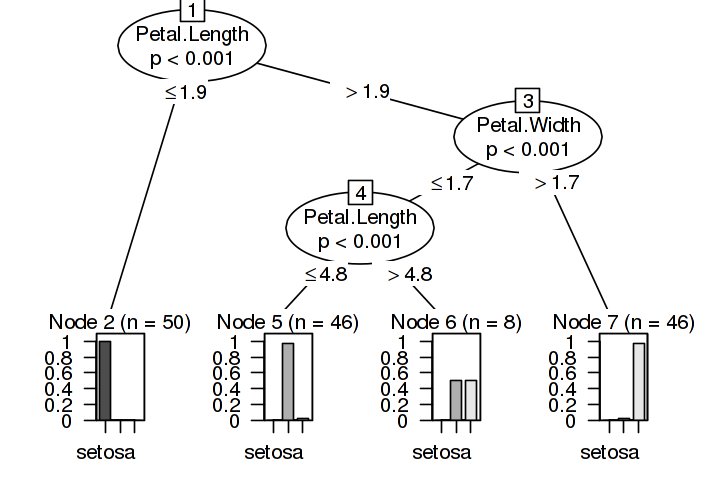

In [33]:
plot(iris.ctree)

In [35]:
ctree.pred <- predict(iris.ctree, newdata=iris)
table(pred=ctree.pred, observ=iris$Species)

            observ
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         5
  virginica       0          1        45